In [1]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv("./FireStatistic_latlong.csv")
df2 = pd.read_csv("./FireStatistic.csv")

df2 = df2.loc[:, ['ocurdo', 'ocursgg', 'ocurjibun']]

print('FireStatistic, count: ')
display(df2.count())
df.drop(['Unnamed: 0'], axis=1, inplace=True)

print('FireStatistic_latlong, count: ')
display(df.count())
print('FireStatistic_latlong, isna: ')
display(df.isna().sum())

df.dropna(inplace=True)
print('FireStatistic_latlong, dropna, count: ')
display(df.count())

FireStatistic, count: 


ocurdo       10560
ocursgg      10560
ocurjibun    10560
dtype: int64

FireStatistic_latlong, count: 


juso    10348
경도      10152
위도      10152
dtype: int64

FireStatistic_latlong, isna: 


juso    212
경도      408
위도      408
dtype: int64

FireStatistic_latlong, dropna, count: 


juso    10152
경도      10152
위도      10152
dtype: int64

In [78]:
import pandas as pd
import numpy as np
df = pd.read_csv("./FireStatistic.csv", na_filter=True, keep_default_na=False, na_values=[''])

In [80]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,diravg,dirmax,dmgarea,dmgmoney,exintgtm,extingdt,humidcurr,humidmin,humidrel,ocurcause,ocurdo,ocurdt,ocuremd,ocurgm,ocurjibun,ocurri,ocursgg,ocuryoil,ownersec,rainamount,raindays,riskavg,riskmax,tempavg,windavg,windmax
0,SE,S,0.19,0,300,201406191800,0.0,0.0,57.0,쓰레기소각,강원,201406191500,남,북부,산226-1,남전,인제,목,,0.5,6,0.0,0.0,23.6,1.9,5.6
1,NNE,SE,0.08,0,210,201406182015,0.0,0.0,46.0,담뱃불실화 추정,경남,201406181805,삼랑진,경남,산123-1,미전,밀양,수,,1.5,6,0.0,0.0,29.6,2.4,4.0
2,NW,SSW,0.05,0,310,201406151720,0.0,0.0,57.0,도로공사(용접불티)비화,강원,201406151410,인제,강원,산70,가아,인제,일,,0.5,2,0.0,0.0,29.3,1.3,6.7
3,WNW,W,0.03,0,140,201406141900,0.0,0.0,46.0,등산객실화 추정,전북,201406141720,보안,전북,산65,신복,부안,토,,1.5,3,0.0,0.0,25.3,3.3,7.8
4,NNE,SSE,0.01,0,242,201406102000,0.0,0.0,40.0,낙뢰추정,강원,201406101718,흥업,북부,산66,매지,원주,화,,0.5,1,0.0,0.0,22.3,2.0,9.9


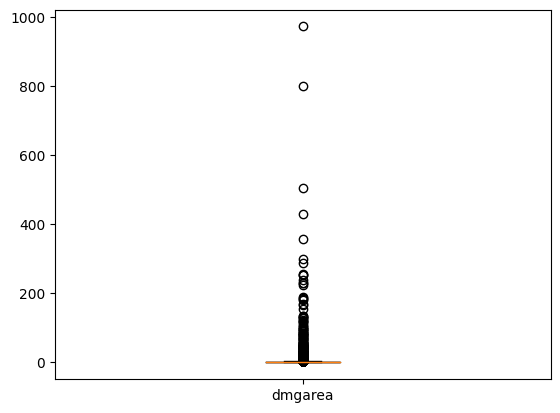

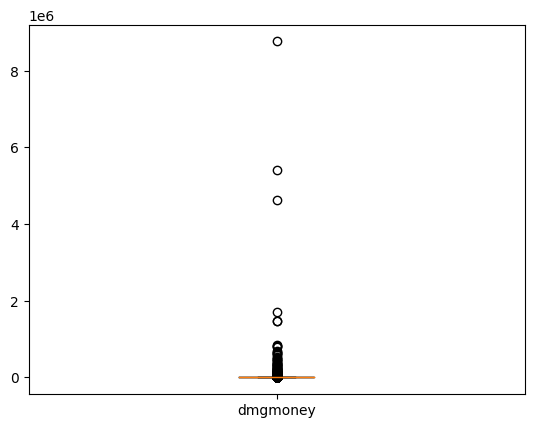

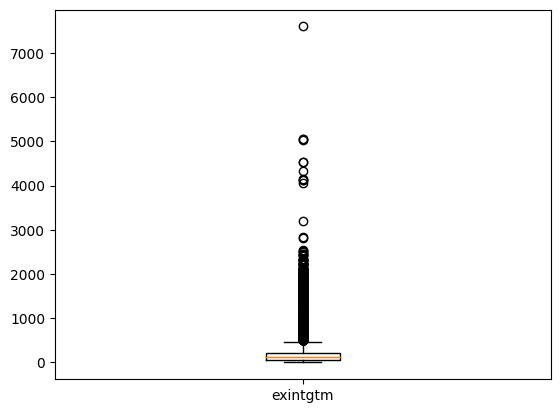

In [71]:
from matplotlib import pyplot as plt

plt.boxplot(df['dmgarea'], )
plt.xticks([1], ['dmgarea'])
plt.show()

plt.boxplot(df['dmgmoney'], )
plt.xticks([1], ['dmgmoney'])
plt.show()

plt.boxplot(df['exintgtm'], )
plt.xticks([1], ['exintgtm'])
plt.show()

KeyError: "None of [Index(['existgtm'], dtype='object')] are in the [columns]"

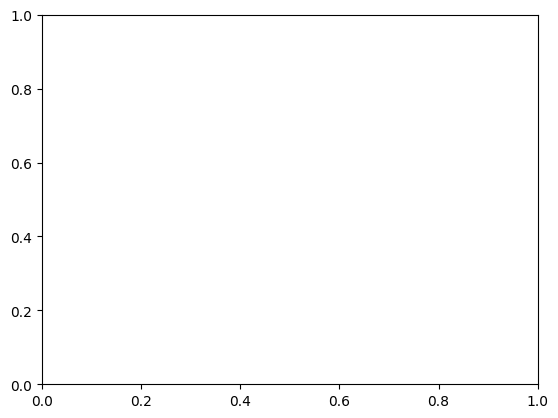

In [57]:
df.boxplot(column=['existgtm'])

In [36]:
df.columns

Index(['diravg', 'dirmax', 'dmgarea', 'dmgmoney', 'exintgtm', 'humidcurr',
       'humidmin', 'humidrel', 'ocurcause', 'ocurdo', 'rainamount', 'raindays',
       'riskavg', 'riskmax', 'tempavg', 'windavg', 'windmax', 'within_5km',
       'within_10km', 'within_30km', 'within_5km_fact', 'within_10km_fact',
       'within_30km_fact', 'height', 'scale_damage'],
      dtype='object')

In [41]:
df['dmgarea'] = df['dmgarea'].astype('float64')

In [27]:
df['ocurdo'].unique()


array(['강원', '경남', '전북', '충북', '경북', '서울', '경기', '전남', '인천', '충남', '대전',
       '울산', '대구', '부산', '광주', '세종', '제주', '서부', '전주'], dtype=object)

In [77]:
df['diravg'].unique()

array(['SE', 'NNE', 'NW', 'WNW', 'E', 'N', 'W', 'SSW', 'S', 'NNW', 'SSE',
       'SW', 'ESE', 'ENE', 'WSW', 'NE', '정온', '5', ' ', 'EWE', 'ENW',
       'WNN', 'w', 'SEE', 'NWW', 'SWW', 'NEE', 'nnw', 'WESE', 'sw', 'nw'],
      dtype=object)

In [74]:
# diravg lowercase
df['diravg'] = df['diravg'].str.lower()
# delete dirty data on diravg
df = df[df['diravg'] != '정온']
# drop number on diravg
df['diravg'] = df['diravg'].str.replace(pat=r'[0-9]', repl=r'', regex=True)
# drop space on diravg
df['diravg'] = df['diravg'].str.replace(pat=r' ', repl=r'', regex=True)
df = df[df['diravg'] != '']

df['diravg'].unique()

array(['se', 'nne', 'nw', 'wnw', 'e', 'n', 'w', 'ssw', 's', 'nnw', 'sse',
       'sw', 'ese', 'ene', 'wsw', 'ne', 'ewe', 'enw', 'wnn', 'see', 'nww',
       'sww', 'nee', 'wese'], dtype=object)

In [14]:
df['diravg'].unique()
df['ocurdo'].unique()

array(['강원', '경남', '전북', '충북', '경북', '서울', '경기', '전남', '인천', '충남', '대전',
       '울산', '대구', '부산', '광주', '세종', '제주', '서부', '전주'], dtype=object)

In [68]:
df['exintgtm'].replace(' ', np.nan, inplace=True)

In [69]:
df['exintgtm'][df['exintgtm'].isna()]

1839    NaN
9763    NaN
Name: exintgtm, dtype: object

In [70]:
df.dropna(axis=0, inplace=True, how='any')
df['exintgtm'] = df['exintgtm'].astype(int)

In [20]:
# # delete exintgtm outlier
# df = df[df['exintgtm'] >2400] * 0.7

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = (scaler.fit_transform(df[df['dmgarea'] > 1]['dmgarea'].to_numpy().reshape(-1, 1)) * 3) +1
# df['dmgarea'][df['dmgarea'] > 1] = scaled_data.ravel()

In [43]:
df['ocurdo'] = df['ocurdo'].replace('서부', '전북')
df['ocurdo'].unique()

array(['강원', '경남', '전북', '충북', '경북', '서울', '경기', '전남', '인천', '충남', '울산',
       '대전', '대구', '부산', '광주', '세종', '제주', '전주'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10560 entries, 0 to 10559
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10560 non-null  int64  
 1   diravg      10560 non-null  object 
 2   dirmax      10560 non-null  object 
 3   dmgarea     10560 non-null  float64
 4   dmgmoney    10560 non-null  int64  
 5   exintgtm    10560 non-null  object 
 6   extingdt    10560 non-null  int64  
 7   humidcurr   10560 non-null  float64
 8   humidmin    10560 non-null  float64
 9   humidrel    10560 non-null  float64
 10  ocurcause   10560 non-null  object 
 11  ocurdo      10560 non-null  object 
 12  ocurdt      10560 non-null  int64  
 13  ocuremd     10560 non-null  object 
 14  ocurgm      10560 non-null  object 
 15  ocurjibun   10560 non-null  object 
 16  ocurri      10560 non-null  object 
 17  ocursgg     10560 non-null  object 
 18  ocuryoil    10560 non-null  object 
 19  ownersec    10560 non-nul

/tmp/ipykernel_1824376/314986824.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True)


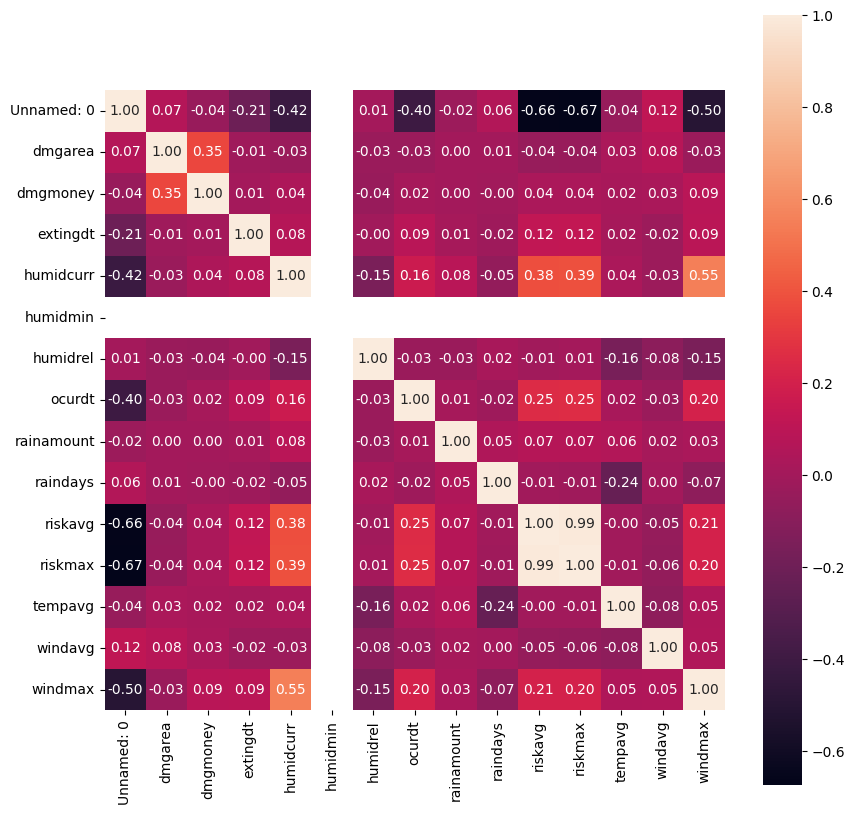

Index(['Unnamed: 0', 'diravg', 'dirmax', 'dmgarea', 'dmgmoney', 'exintgtm',
       'extingdt', 'humidcurr', 'humidmin', 'humidrel', 'ocurcause', 'ocurdo',
       'ocurdt', 'ocuremd', 'ocurgm', 'ocurjibun', 'ocurri', 'ocursgg',
       'ocuryoil', 'ownersec', 'rainamount', 'raindays', 'riskavg', 'riskmax',
       'tempavg', 'windavg', 'windmax'],
      dtype='object')


/tmp/ipykernel_1824376/314986824.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


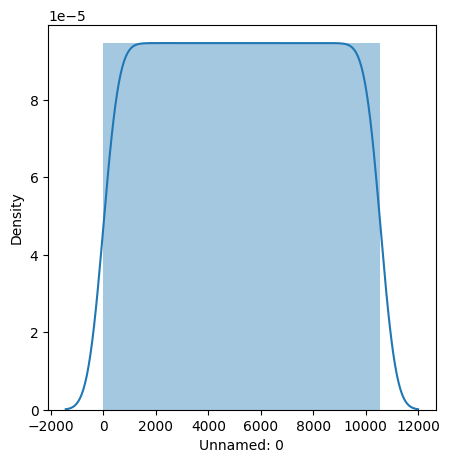

/tmp/ipykernel_1824376/314986824.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

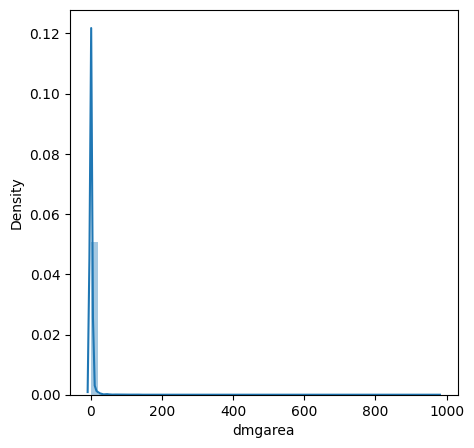

/tmp/ipykernel_1824376/314986824.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


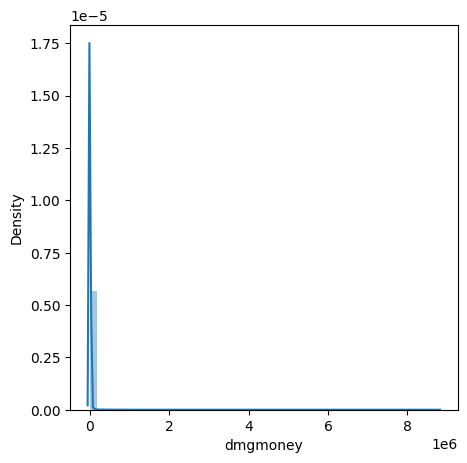

/tmp/ipykernel_1824376/314986824.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


<Figure size 500x500 with 0 Axes>

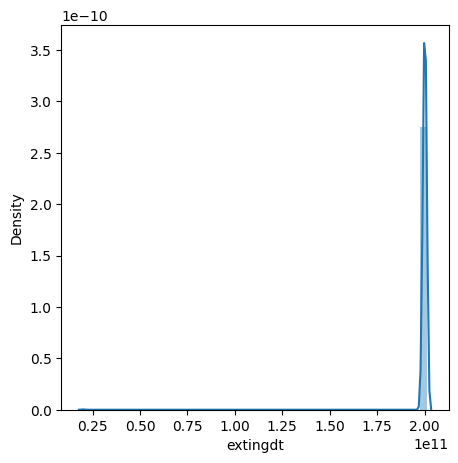

/tmp/ipykernel_1824376/314986824.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


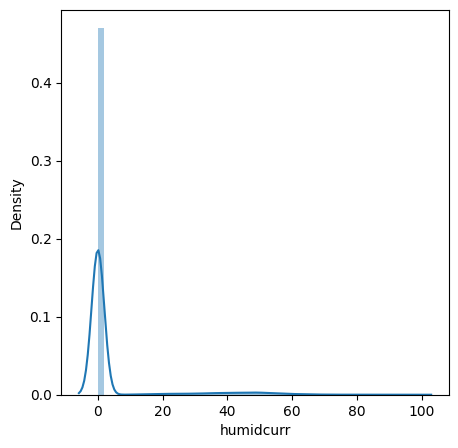

/tmp/ipykernel_1824376/314986824.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/home/jaezic/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


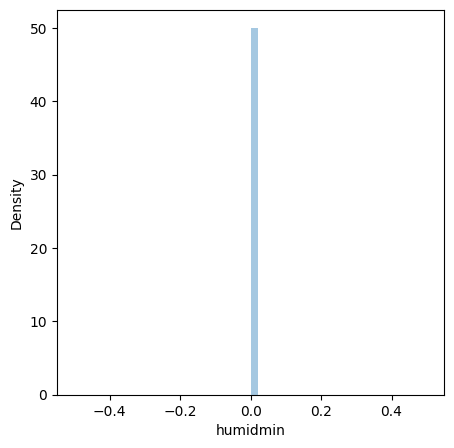

/tmp/ipykernel_1824376/314986824.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


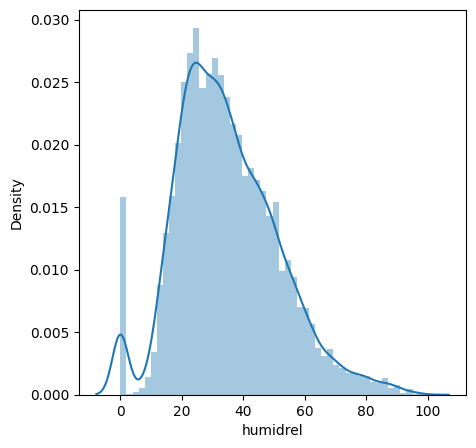

/tmp/ipykernel_1824376/314986824.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

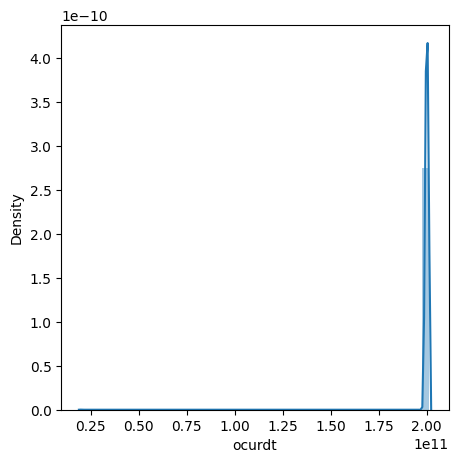

/tmp/ipykernel_1824376/314986824.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

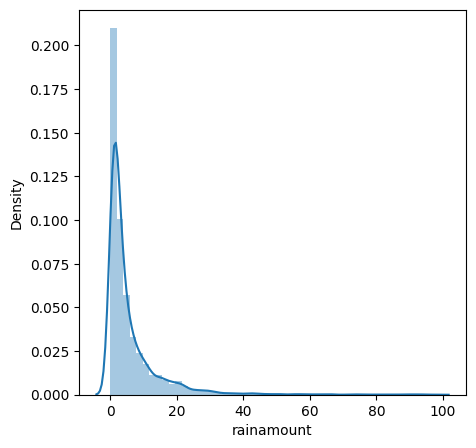

/tmp/ipykernel_1824376/314986824.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


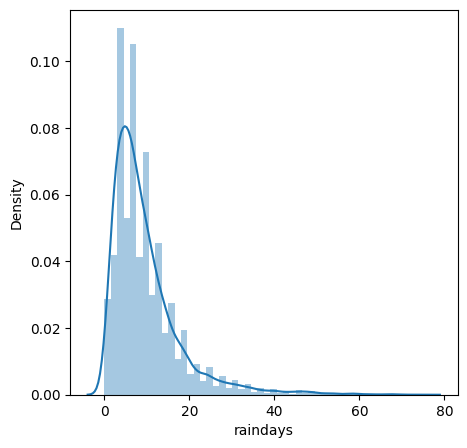

/tmp/ipykernel_1824376/314986824.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


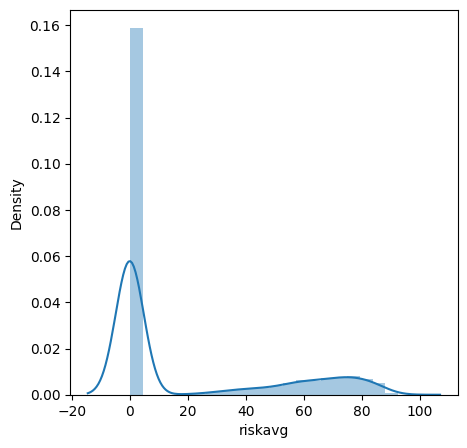

/tmp/ipykernel_1824376/314986824.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


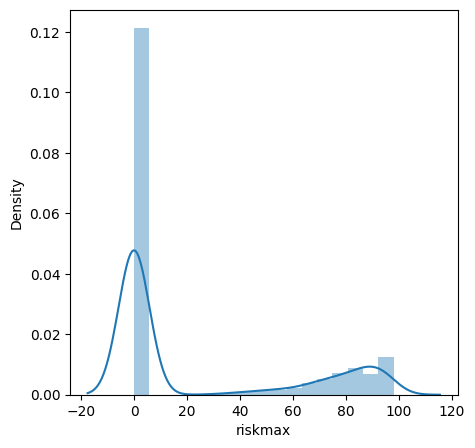

/tmp/ipykernel_1824376/314986824.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


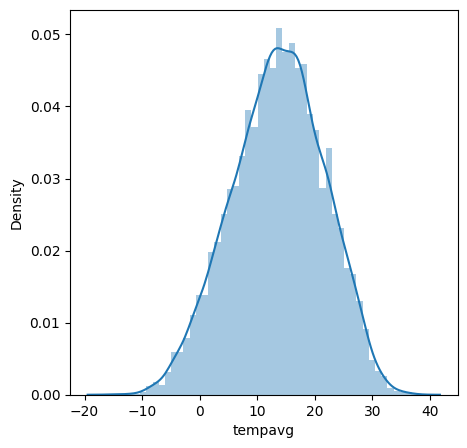

/tmp/ipykernel_1824376/314986824.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


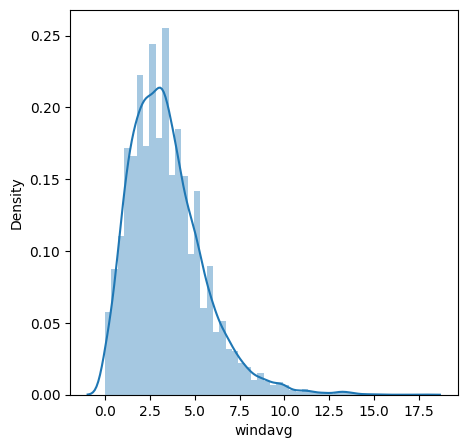

/tmp/ipykernel_1824376/314986824.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


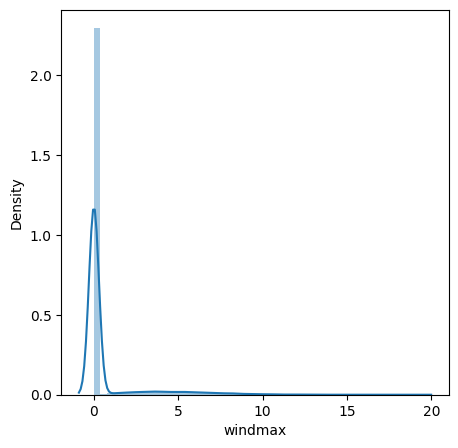

In [53]:
print(df.info())
print(df.head())
print(df.describe())
print(df.isna().sum())

# Visualization

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True)
plt.show()

print(df.columns)
# ['diravg', 'dirmax', 'humidcurr', 'humidmin', 'humidrel', 'ocurcause',
#       'rainamount', 'raindays', 'riskavg', 'riskmax', 'tempavg', 'windavg',
#       'windmax', 'within_5km', 'within_10km', 'within_30km', 'height',
#       'scale_damage']

# columns distribution

for col in df.columns:
    try:
        plt.figure(figsize=(5, 5))
        sns.distplot(df[col])
        plt.show()
    except:
        plt.clf()

/tmp/ipykernel_1824376/2732982417.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


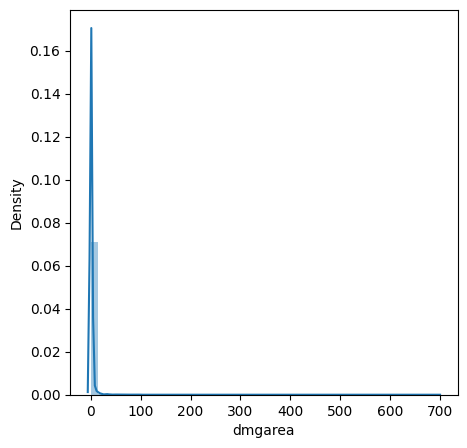

/tmp/ipykernel_1824376/2732982417.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


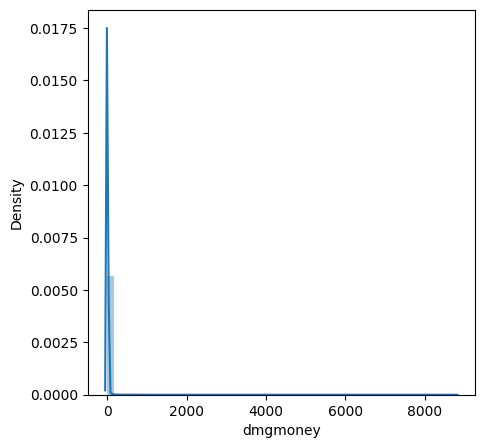

/tmp/ipykernel_1824376/2732982417.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


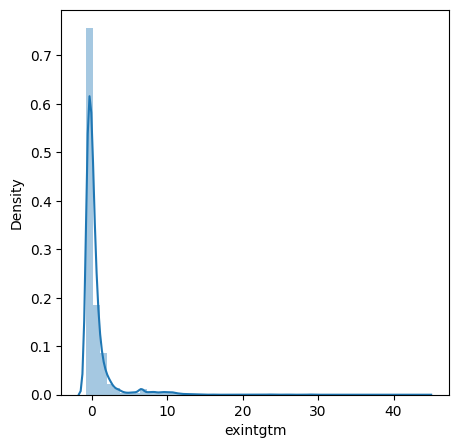

/tmp/ipykernel_1824376/2732982417.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


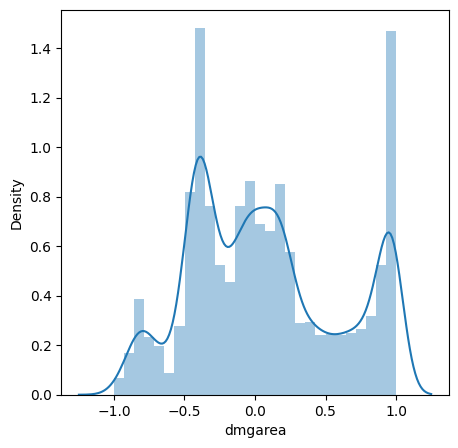

/tmp/ipykernel_1824376/2732982417.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


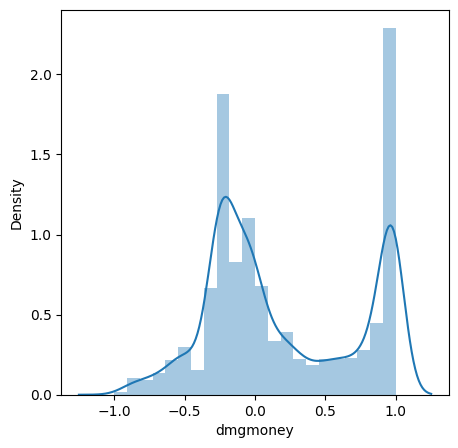

/tmp/ipykernel_1824376/2732982417.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


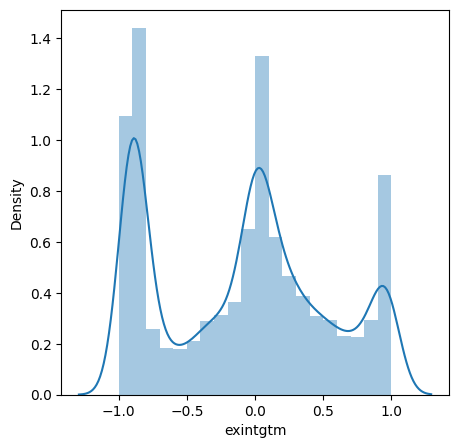

In [72]:
# dmgarea, dmgmoney, exintgtm -> normalize, and plot again
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

scaler = RobustScaler()
df[['dmgarea', 'dmgmoney', 'exintgtm']] = scaler.fit_transform(
    df[['dmgarea', 'dmgmoney', 'exintgtm']])
for col in ['dmgarea', 'dmgmoney', 'exintgtm']:
    plt.figure(figsize=(5, 5))
    sns.distplot(df[col])
    plt.show()

scaler = Normalizer()
df[['dmgarea', 'dmgmoney', 'exintgtm']] = scaler.fit_transform(
    df[['dmgarea', 'dmgmoney', 'exintgtm']])
for col in ['dmgarea', 'dmgmoney', 'exintgtm']:
    plt.figure(figsize=(5, 5))
    sns.distplot(df[col])
    plt.show()
    


In [44]:
# value that contains '입산자실화 ~~' convert to '입산자실화'
df['ocurcause'] = df['ocurcause'].apply(lambda x: x.replace('추정','') if '추정' in x else x)
df['ocurcause'] = df['ocurcause'].apply(lambda x: '입산자실화' if '입산자' in x or '실화' in x or '발화' in x or '행위' in x or '훈련' in x else x)


df['ocurcause'] = df['ocurcause'].apply(lambda x: '담배' if '담뱃' in x or '담배' in x else x)
df['ocurcause'] = df['ocurcause'].apply(lambda x: '소각' if '소각' in x else x)
df['ocurcause'] = df['ocurcause'].apply(lambda x: '방화' if '방화' in x else x)
df['ocurcause'] = df['ocurcause'].apply(lambda x: '미상' if '미상' in x else x)
df['ocurcause'] = df['ocurcause'].apply(lambda x: '화재' if '화재' in x else x)
df['ocurcause'] = df['ocurcause'].apply(lambda x: '불장난' if '장난' in x else x)

cnt = df['ocurcause'].value_counts()
df['ocurcause'] = df['ocurcause'].apply(lambda x: '기타' if cnt[x] < 37 else x)

In [46]:
from sklearn.calibration import LabelEncoder
LabelEncoder = LabelEncoder()
df['ocurcause'] = LabelEncoder.fit_transform(df['ocurcause'])
df['ocurdo'] = LabelEncoder.fit_transform(df['ocurdo'])
df['diravg'] = LabelEncoder.fit_transform(df['diravg'])


/tmp/ipykernel_1824376/3582196830.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


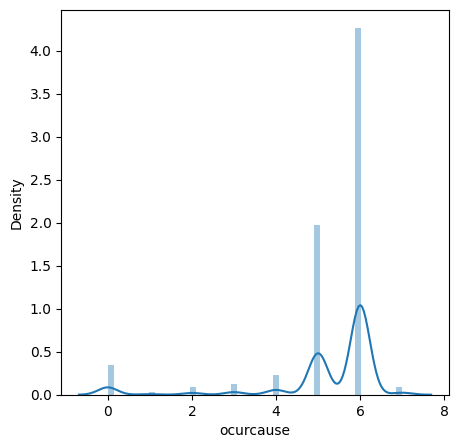

/tmp/ipykernel_1824376/3582196830.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


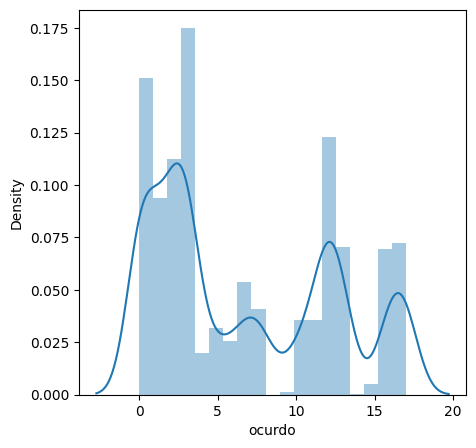

/tmp/ipykernel_1824376/3582196830.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


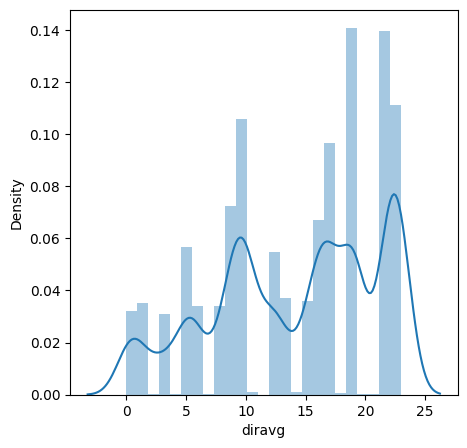

In [49]:
# distribution, ocurcause, ocurdo, diravg
from matplotlib import pyplot as plt
import seaborn as sns
for col in ['ocurcause', 'ocurdo', 'diravg']:
    plt.figure(figsize=(5, 5))
    sns.distplot(df[col])
    plt.show()
    

입산자실화    6071
소각       2780
기타        498
불장난       320
방화        182
화재        139
미상        121
낙뢰         39
Name: ocurcause, dtype: int64


/home/jaezic/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jaezic/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jaezic/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jaezic/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jaezic/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(byte

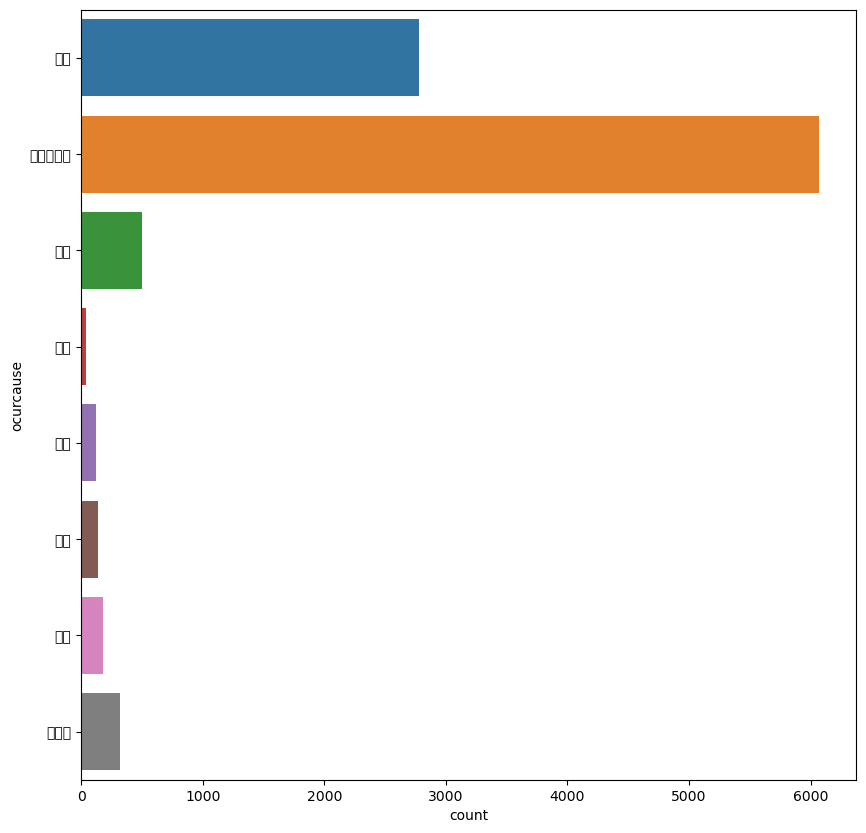

In [29]:
# print unique values count in 'ocurcause'
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.min_rows', 500)
pd.set_option('display.expand_frame_repr', True)
print(df['ocurcause'].value_counts())

from matplotlib import rc
plt.rcParams['font.family'] = 'NanumGothic'
# Ocurcause Plot
plt.figure(figsize=(10, 10))
sns.countplot(y='ocurcause', data=df)
plt.show()


In [26]:
# value counts of ocurcause lower than 5 is grouped into '기타'
df['ocurcause'] = df['ocurcause'].apply(lambda x: '기타' if df['ocurcause'].value_counts()[x] < 50 else x)

KeyboardInterrupt: 

In [ ]:
print(df['ocurcause'].unique())

['소각' '입산자실화' '기타' '미상' '화재' '방화' '불장난']
